In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_shelter = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD')

In [5]:
df_shelter.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [0]:
df_shelter = df_shelter[df_shelter['Report Date']=='09/30/2019']

In [7]:
df_shelter.drop_duplicates()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [0]:
shelter_filtered = df_shelter.fillna(0)

In [0]:
shelter_filtered['total'] = shelter_filtered['Adult Family Comm Hotel'] + shelter_filtered['Adult Family Shelter'] + shelter_filtered['Adult Shelter'] + shelter_filtered['Adult Shelter Comm Hotel'] + shelter_filtered['FWC Cluster'] + shelter_filtered['FWC Comm Hotel'] + shelter_filtered['FWC Shelter']

In [10]:
shelter_filtered.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0


In [0]:
all_requests = df[df.complaint_type =='Homeless Person Assistance']

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [0]:
homeless = df[df.complaint_type == 'Homeless Person Assistance']

In [14]:
count_homeless = homeless.groupby('borocd').size().reset_index(name='count_of_homeless_311_requests')
count_homeless.head(100)

,borocd,count_of_homeless_311_requests
0,101.0,758
1,102.0,965
2,103.0,520
3,104.0,1055
4,105.0,3020
5,106.0,753
6,107.0,1684
7,108.0,633
8,109.0,303
9,110.0,283


In [0]:
merged_data = pd.merge(left=count_homeless, how='left', right=shelter_filtered, left_on='borocd', right_on='Community District')

In [16]:
merged_data=merged_data.fillna(0)
merged_data.head()

,borocd,count_of_homeless_311_requests,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
0,101.0,758,09/30/2019,Manhattan,101.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,102.0,965,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103.0,520,09/30/2019,Manhattan,103.0,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
3,104.0,1055,09/30/2019,Manhattan,104.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
4,105.0,3020,09/30/2019,Manhattan,105.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0


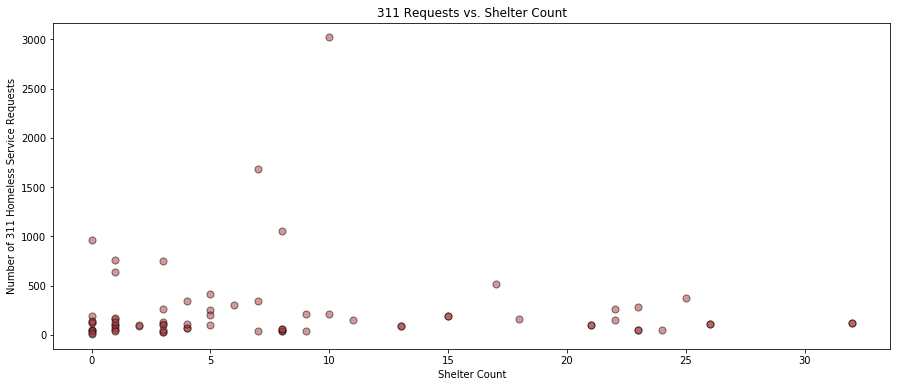

In [17]:
x = np.array(merged_data.total)
y = np.array(merged_data.count_of_homeless_311_requests)

color = '#a83232' 
area = 50 

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 

plt.title('311 Requests vs. Shelter Count')
plt.xlabel('Shelter Count')
plt.ylabel('Number of 311 Homeless Service Requests') 

plt.show()

In [18]:
x = np.array(merged_data['total']/1000)
y = np.array(merged_data.count_of_homeless_311_requests)

np.corrcoef(x, y)

array([[ 1.        , -0.02042157],
       [-0.02042157,  1.        ]])

In [19]:
y = np.array(merged_data.count_of_homeless_311_requests)

x = np.array(merged_data['total'])
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

print(model.summary())

[[ 1.  1.]
 [ 1.  0.]
 [ 1. 17.]
 [ 1.  8.]
 [ 1. 10.]
 [ 1.  3.]
 [ 1.  7.]
 [ 1.  1.]
 [ 1.  6.]
 [ 1. 23.]
 [ 1. 25.]
 [ 1.  3.]
 [ 1. 15.]
 [ 1. 15.]
 [ 1.  8.]
 [ 1.  8.]
 [ 1. 23.]
 [ 1. 23.]
 [ 1. 32.]
 [ 1. 32.]
 [ 1. 21.]
 [ 1. 21.]
 [ 1. 26.]
 [ 1. 26.]
 [ 1. 13.]
 [ 1. 13.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  8.]
 [ 1.  8.]
 [ 1.  3.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  4.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1. 22.]
 [ 1. 10.]
 [ 1. 18.]
 [ 1.  4.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1.  2.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  2.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. 24.]
 [ 1.  4.]
 [ 1.  3.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  7.]
 [ 1.  0.]
 [ 1. 22.]
 [ 1.  9.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1.  0.]
 [ 1.  0.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:     

In [20]:
p = model.params 
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [254.28120088  -0.98829495]
R2: 0.00041704046351909163


In [21]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -0.99x + 254.28; R2 = 0.0


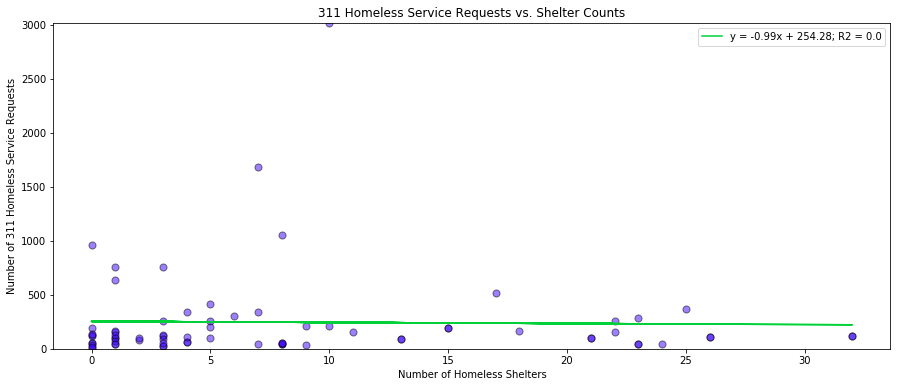

In [22]:
x_dummy = np.array(merged_data['total'])

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data['total']), 
    np.array(merged_data.count_of_homeless_311_requests), 
    s=50,
    c='#3d03fc', 
    edgecolors='black',
    alpha=0.5) 

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', 
    label=label)

plt.ylim(0, max(np.array(merged_data.count_of_homeless_311_requests)))

plt.title('311 Homeless Service Requests vs. Shelter Counts')
plt.xlabel('Number of Homeless Shelters')
plt.ylabel('Number of 311 Homeless Service Requests')
plt.legend()

plt.show()

There seems to be no correlation between the number of homeless shelters and the number of 311 homeless requests according to the chart and the regression results.